In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [379]:
data = pd.read_csv("D:\PythonProjects\HousePricePrediction\dataset\housing.csv", sep=",") # Loading data to read

In [380]:
data.head(10) # First approac to data to predictions. (Ocean_proximity is categorical(Ordinal) use them as factors is a good approach.)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [381]:
data.info() # Checikng for NA.  total_bedrooms have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [382]:
data.dropna(inplace=True) # Dropping na values and save the dataset.

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [384]:
# Splitting data as train and test

In [385]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis= 1 )
y = data['median_house_value']

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [387]:
train_data = X_train.join(y_train)

In [388]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18291,-122.12,37.37,18.0,1617.0,231.0,555.0,222.0,8.9021,NEAR BAY,500001.0
2618,-124.11,40.93,17.0,1661.0,329.0,948.0,357.0,2.7639,NEAR OCEAN,90200.0
18124,-122.02,37.33,25.0,3823.0,584.0,1689.0,571.0,7.3693,<1H OCEAN,373600.0
11052,-117.85,33.79,52.0,1963.0,430.0,1197.0,415.0,3.8929,<1H OCEAN,211000.0
8470,-118.31,33.91,36.0,961.0,173.0,625.0,179.0,4.2596,<1H OCEAN,181100.0
...,...,...,...,...,...,...,...,...,...,...
26,-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.4597,NEAR BAY,93800.0
16813,-122.42,37.65,39.0,4402.0,894.0,2941.0,887.0,3.8565,NEAR OCEAN,239800.0
2859,-118.94,35.39,13.0,3137.0,417.0,1318.0,397.0,7.7751,INLAND,194100.0
13516,-117.35,34.11,34.0,2104.0,388.0,1578.0,365.0,3.0833,INLAND,88400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

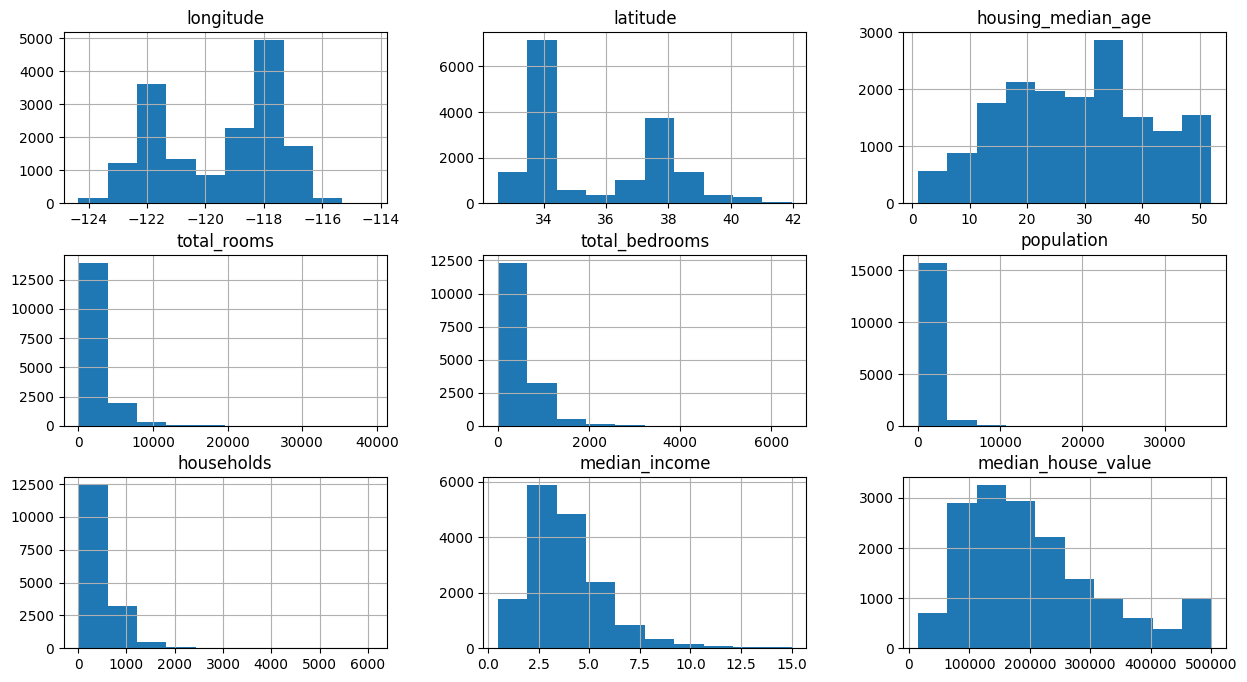

In [389]:
train_data.hist(figsize=(15, 8)) # Draw histogram of train data to get correlation

<Axes: >

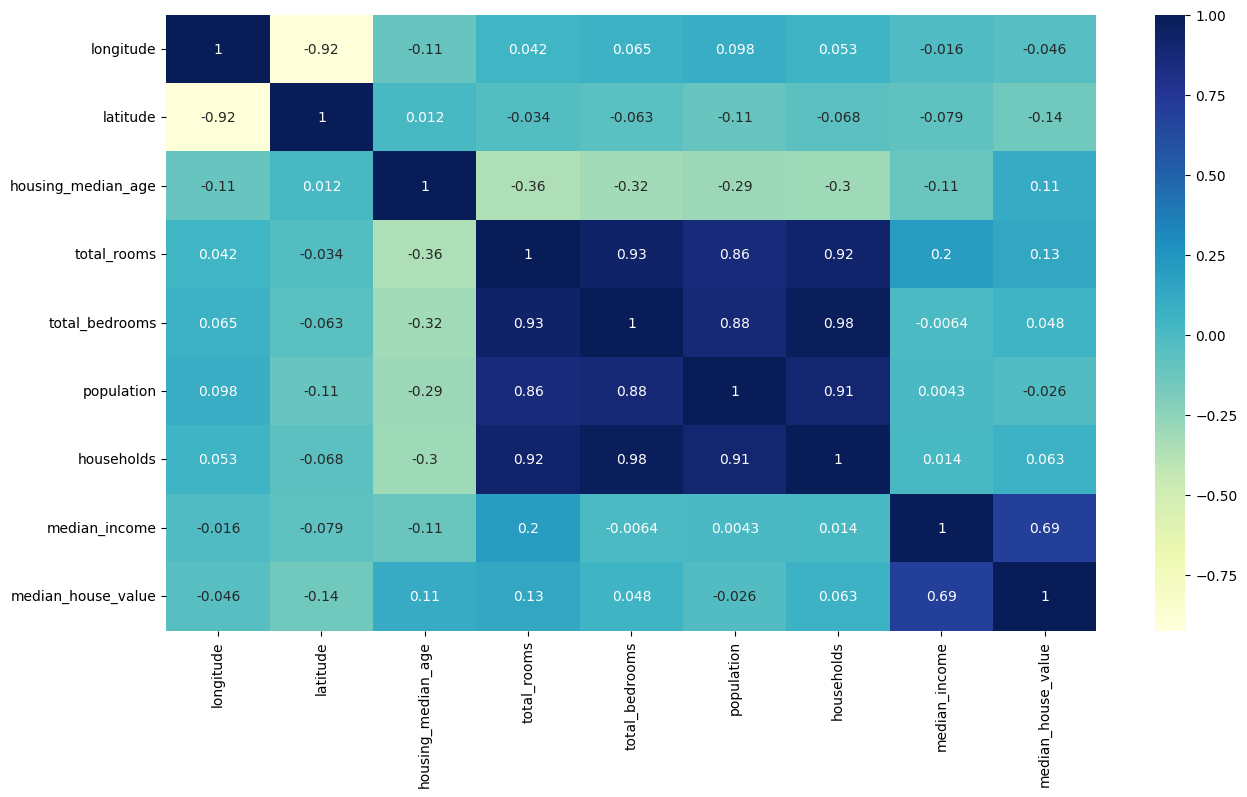

In [390]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

In [391]:
train_data["total_rooms"] = np.log(train_data['total_rooms'] + 1)
train_data["total_bedrooms"] = np.log(train_data['total_bedrooms'] + 1)
train_data["population"] = np.log(train_data['population'] + 1)
train_data["households"] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

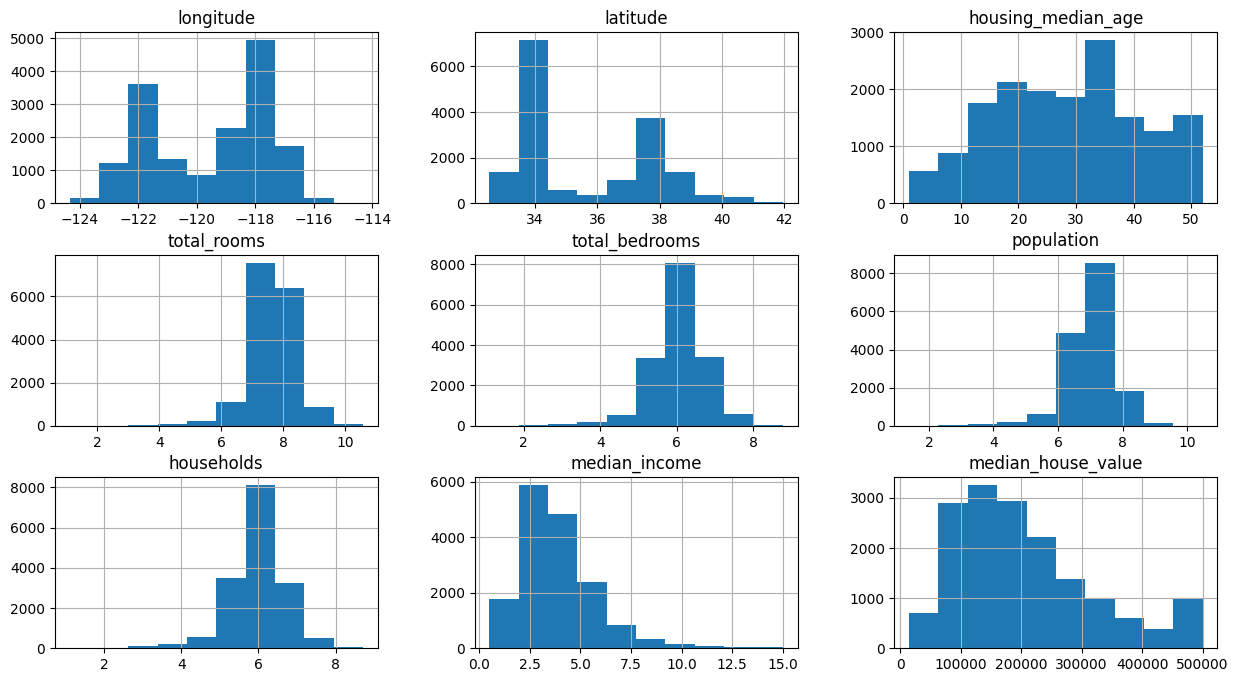

In [392]:
train_data.hist(figsize=(15,8))

In [393]:
# Dealing with categorical values.

train_data.ocean_proximity.value_counts()

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

train_data = train_data.drop(['ISLAND'], axis=1)

In [394]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
18291,-122.12,37.37,18.0,7.388946,5.446737,6.320768,5.407172,8.9021,500001.0,False,False,True,False
2618,-124.11,40.93,17.0,7.415777,5.799093,6.855409,5.880533,2.7639,90200.0,False,False,False,True
18124,-122.02,37.33,25.0,8.249052,6.371612,7.432484,6.349139,7.3693,373600.0,True,False,False,False
11052,-117.85,33.79,52.0,7.582738,6.066108,7.088409,6.030685,3.8929,211000.0,True,False,False,False
8470,-118.31,33.91,36.0,6.869014,5.159055,6.439350,5.192957,4.2596,181100.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-122.28,37.85,49.0,7.030857,5.501258,6.410175,5.480639,2.4597,93800.0,False,False,True,False
16813,-122.42,37.65,39.0,8.390041,6.796824,7.986845,6.788972,3.8565,239800.0,False,False,False,True
2859,-118.94,35.39,13.0,8.051341,6.035481,7.184629,5.986452,7.7751,194100.0,False,True,False,False
13516,-117.35,34.11,34.0,7.652071,5.963579,7.364547,5.902633,3.0833,88400.0,False,True,False,False


<Axes: >

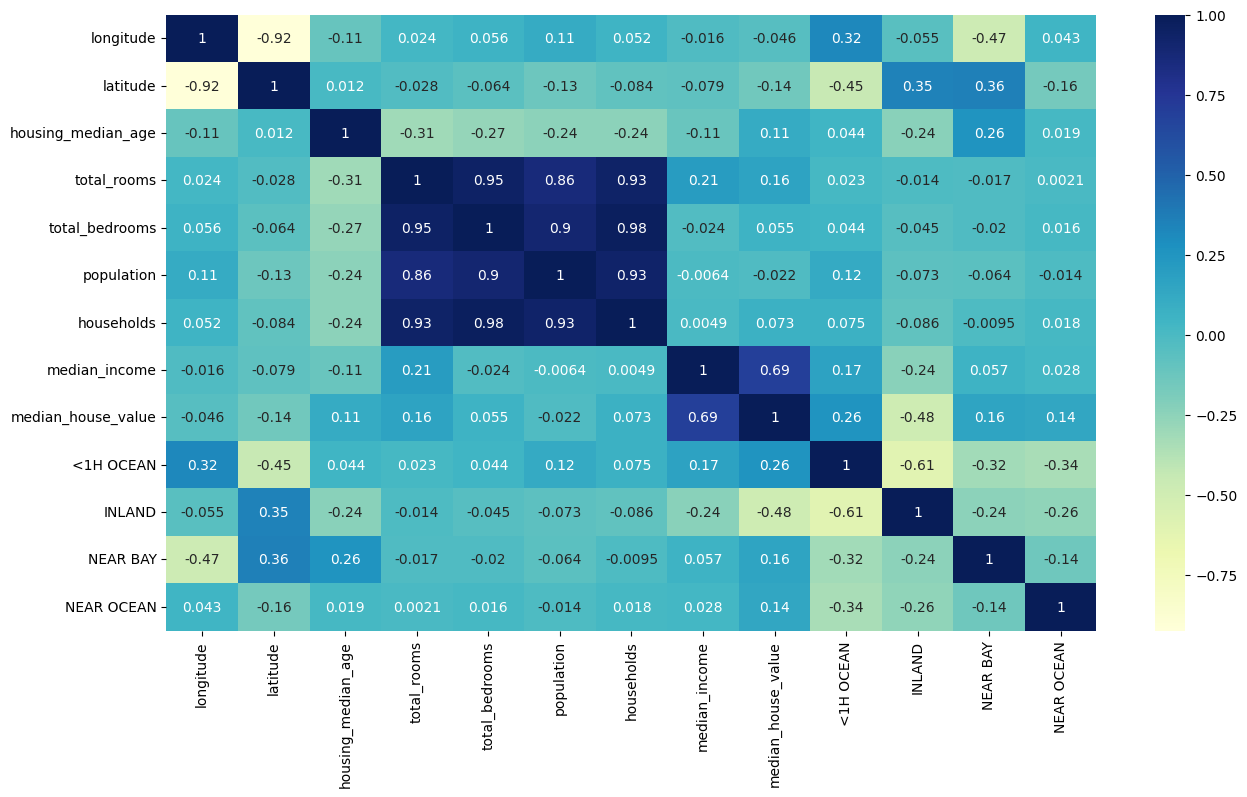

In [395]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

<Axes: xlabel='latitude', ylabel='longitude'>

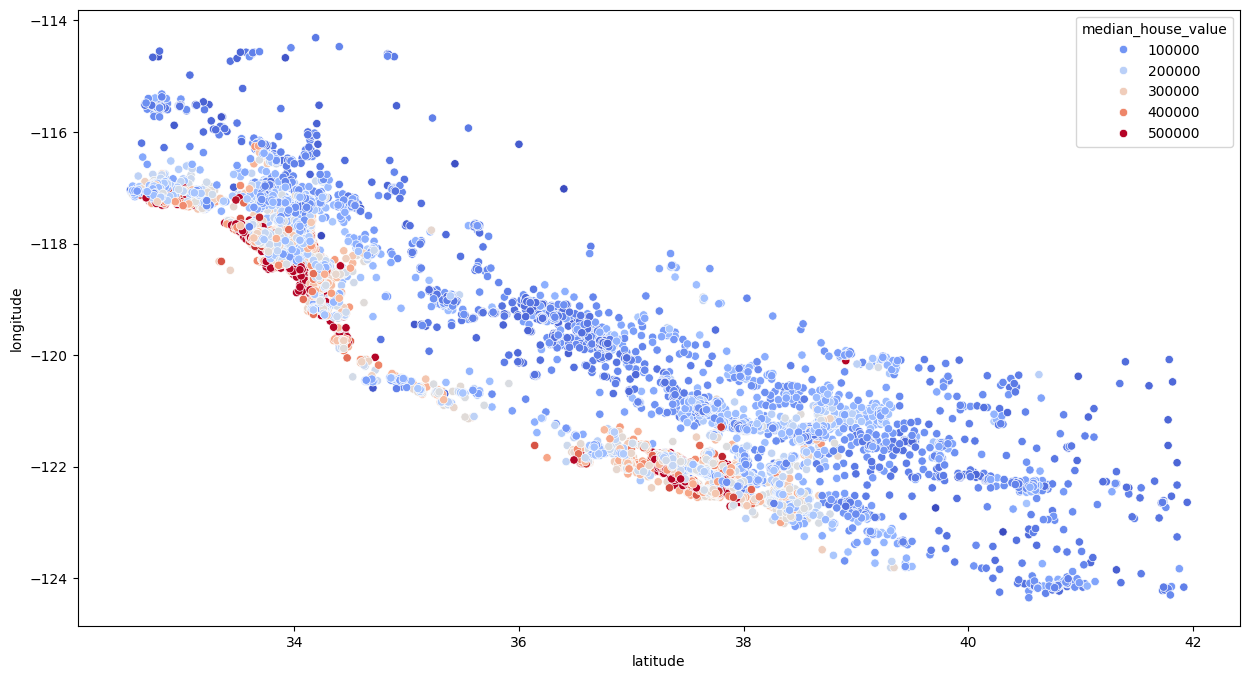

In [396]:
# Plotting corr between house locations.

plt.figure(figsize=(15, 8))

sns.scatterplot(x = "latitude", y = "longitude", data=train_data, hue="median_house_value", palette="coolwarm") 

In [397]:
# Finding real correlation between bedrooms and householdrooms and median house value.

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

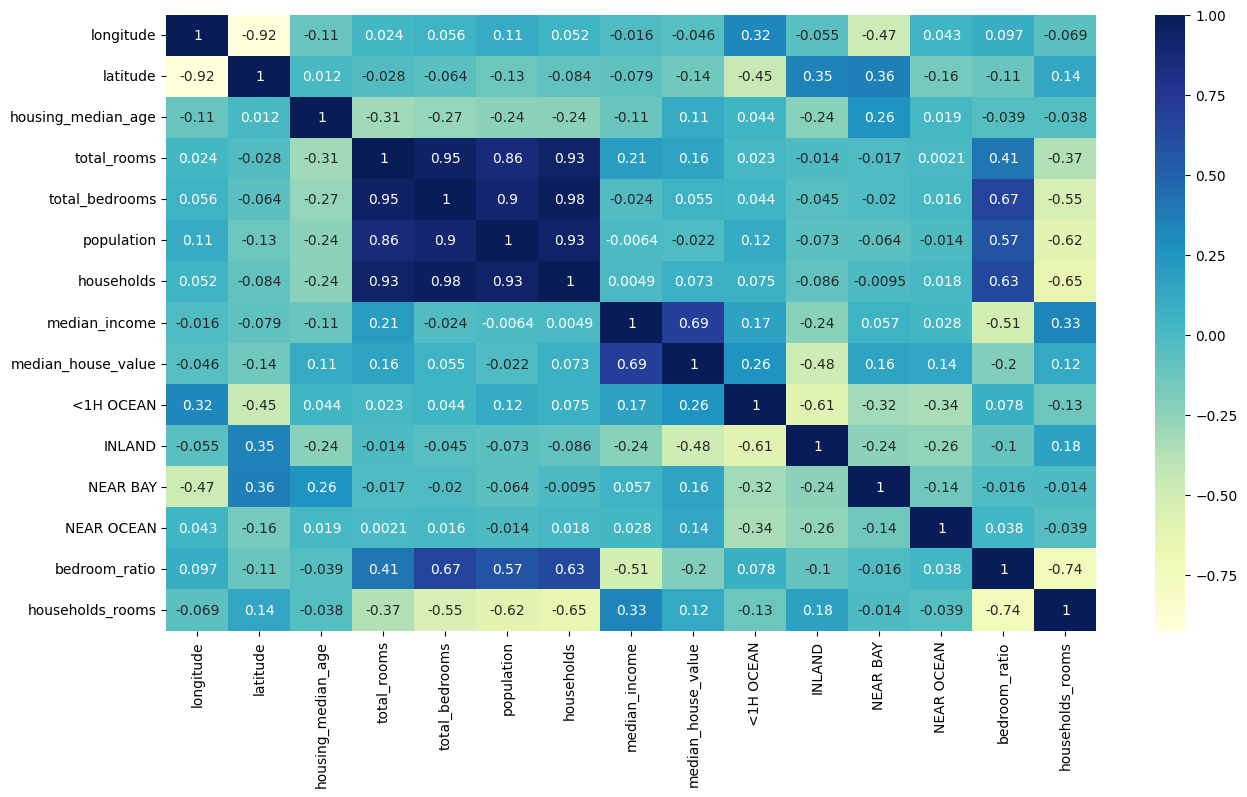

In [398]:
plt.figure(figsize=(15,8)) # Const fix for plots
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu") # Looking at correlations.

In [399]:
# Getting linear reggresion.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [400]:
test_data = X_test.join(y_test)


test_data["total_rooms"] = np.log(test_data['total_rooms'] + 1)
test_data["total_bedrooms"] = np.log(test_data['total_bedrooms'] + 1)
test_data["population"] = np.log(test_data['population'] + 1)
test_data["households"] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

test_data = test_data.drop(["ISLAND"], axis=1)

KeyError: "['ISLAND'] not found in axis"

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data["median_house_value"]

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

C:\Users\gulse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-383.76493159015615

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [377]:
forest.score(X_test_s, y_test)

0.8250237740716203

In [403]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [3, 10, 30],
    "max_features" : [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [405]:
best_forest = grid_search.best_estimator_

In [406]:
best_forest.score(X_test_s, y_test)

-0.9009162377515769